In [29]:
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [30]:
df = pd.read_csv('synthetic_dataset.csv')
df = df.set_index('Unnamed: 0')
scaler = StandardScaler()
df[df.drop(['Outcome'],axis=1).columns] = scaler.fit_transform(df[df.drop(['Outcome'],axis=1).columns])
X = df.drop(['Outcome'],axis = 1)
y = df['Outcome']
X_train, X_test,y_train, y_test = train_test_split(X, y ,random_state=101, test_size=0.3, shuffle=True)
# sns.pairplot(df)

In [72]:
class Model:
    y = []
    X = []
    w = []
#     alpha = 0.001
    features = 0
    samples = 0
    def __init__(self,X,y,epochs = 500, alpha = 0.1):
        self.X = np.hstack((np.ones((X.shape[0],1)),X))
        self.y = np.array(y)
        self.w = np.zeros(self.X.shape[1])
        self.samples = X.shape[0]
        self.epochs = epochs
        self.alpha = alpha
        self.features = X.shape[1]+1
    
    def fit(self):
        for epoch_counter in range (0,self.epochs):
            for sample_counter in range(0,self.samples):
                output = np.dot(self.X[sample_counter],self.w)-self.y[sample_counter]
                for feature_counter in range(0,self.features):
                    derivative = output*self.X[sample_counter][feature_counter]
                    self.w[feature_counter]-=derivative*self.alpha
            
    def predict(self,X_test):
        X_test1 = np.hstack((np.ones((X_test.shape[0],1)),X_test))
        predictions = []
        for x in X_test1:
            predictions.append(np.dot(x,self.w))
        return np.array(predictions)

In [87]:
myModel = Model(X_train,y_train,200,0.001)
model = LinearRegression()
myModel.fit()
model.fit(X_train,y_train)

LinearRegression()

sklearn: 0.41461568611102434 myModel: 0.41496756416132535


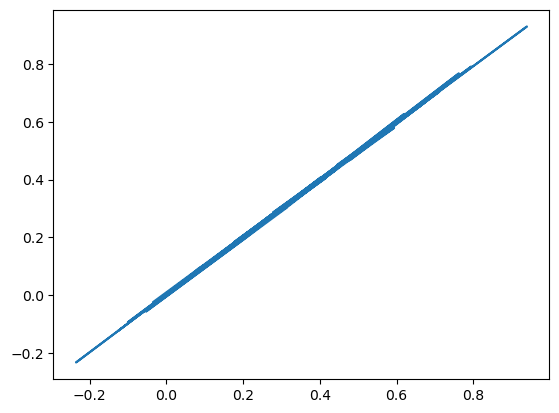

In [88]:
myPredictions = myModel.predict(X_test)
predictions = model.predict(X_test)
plt.plot(predictions,myPredictions)
print(f"sklearn: {np.sqrt(mean_squared_error(y_test, predictions))} myModel: {np.sqrt(mean_squared_error(y_test, myPredictions))}")

In [80]:
def discriminant(x):
    if x<0.5:
        return 0
    return 1

In [81]:
myPredictions

array([ 0.15883708,  0.24839883,  0.30206735,  0.29357294,  0.15361517,
        0.37059991,  0.52216359,  0.3454799 ,  0.29991831,  0.30315438,
        0.45539386,  0.14987605,  0.46591738,  0.15356901,  0.20254758,
        0.77817361,  0.19689251,  0.17757056,  0.11060374,  0.64866936,
        0.67987241,  0.38334793,  0.47481045,  0.23337967,  0.26565176,
        0.13701805,  0.23565512,  0.13073259,  0.36107037,  0.46027753,
        0.61240812,  0.39924841,  0.47587578,  0.1750808 ,  0.11873233,
        0.28478279,  0.2644295 ,  0.40104279,  0.51026769,  0.30436534,
        0.25055053,  0.12733449,  0.2692704 ,  0.22077474,  0.32089993,
        0.5082737 ,  0.24930028,  0.07970481,  0.72766117,  0.54389281,
        0.42481426,  0.44715958, -0.04814677,  0.48517327,  0.62431976,
        0.02525115,  0.71520352,  0.5147475 ,  0.32587922,  0.59668655,
        0.63148603,  0.48478893,  0.5999218 ,  0.02420797,  0.5057535 ,
        0.58028045,  0.21189473,  0.47932663,  0.23609321,  0.61

In [82]:
vectorized_discriminant = np.vectorize(discriminant)
rounded_predictions = vectorized_discriminant(predictions)
rounded_predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [83]:
print(classification_report(y_test, rounded_predictions, target_names=["class 0","class 1"]))

              precision    recall  f1-score   support

     class 0       0.79      0.89      0.84        99
     class 1       0.72      0.55      0.62        51

    accuracy                           0.77       150
   macro avg       0.76      0.72      0.73       150
weighted avg       0.77      0.77      0.76       150



In [84]:
rounded_mypredictions = vectorized_discriminant(predictions)
rounded_mypredictions

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [67]:
print(classification_report(y_test, rounded_mypredictions, target_names=["class 0","class 1"]))

              precision    recall  f1-score   support

     class 0       0.79      0.89      0.84        99
     class 1       0.72      0.55      0.62        51

    accuracy                           0.77       150
   macro avg       0.76      0.72      0.73       150
weighted avg       0.77      0.77      0.76       150



In [68]:
print(confusion_matrix(y_test,rounded_mypredictions))

[[88 11]
 [23 28]]
